# RNA

In [1]:
data_rna <- readRDS('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/RNA/scRNA-Healthy-Hematopoiesis-191120.rds')

In [2]:
data_rna

class: RangedSummarizedExperiment 
dim: 20287 35582 
metadata(6): variableGenes optimizeLSI ... UMAP_Params colorMap
assays(1): counts
rownames(20287): FAM138A OR4F5 ... S100B PRMT2
rowData names(3): gene_name gene_id exonLength
colnames(35582): CD34_32_R5:AAACCTGAGTATCGAA-1
  CD34_32_R5:AAACCTGAGTCGTTTG-1 ...
  BMMC_10x_GREENLEAF_REP2:TTTGTTGCATGTGTCA-1
  BMMC_10x_GREENLEAF_REP2:TTTGTTGCATTGAAAG-1
colData names(10): Group nUMI_pre ... BioClassification Barcode

In [4]:
str(data_rna)

Formal class 'RangedSummarizedExperiment' [package "SummarizedExperiment"] with 6 slots
  ..@ rowRanges      :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. ..@ values         : Factor w/ 24 levels "chr1","chr2",..: 1 2 3 4 5 6 7 23 8 9 ...
  .. .. .. .. ..@ lengths        : int [1:24] 1994 1487 1189 766 886 1042 947 825 672 743 ...
  .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. ..@ metadata       : list()
  .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. ..@ start          : int [1:20287] 34554 69091 134901 367640 621059 752751 761586 803451 818043 860260 ...
  .. .. .. .. ..@ width          : int [1:20287] 1528 918 4479 995 995 2464 1317 8833 1941 19696 ...
  .. .. .. .. ..@ NAMES          : chr [1:20287] "FAM138A" "OR4F5" "AL627309.1" "OR4F29" ...
  .. .. .. .. ..@ elementType    : chr "ANY"
  .. .. .. .. ..@ elementMet

In [10]:
count <- data_rna@assays$data$counts

In [14]:
metadata <- data_rna@colData

In [18]:
table(metadata$Group)


BMMC_D1T1 BMMC_D1T2 CD34_D2T1 CD34_D3T1 PBMC_D4T1 PBMC_D4T2 
     6270      6332      2424      5752      7544      7260 

In [20]:
metadata <- metadata[metadata$Group == 'PBMC_D4T1' | metadata$Group == 'PBMC_D4T2',]

In [21]:
table(metadata$Group)


PBMC_D4T1 PBMC_D4T2 
     7544      7260 

In [22]:
dim(metadata)

[1] 14804    10

In [23]:
table(metadata$BioClassification)


        01_HSC 02_Early.Eryth    05_CMP.LMPP       06_CLP.1         07_GMP 
             4              8              1              8             10 
        09_pDC         10_cDC 11_CD14.Mono.1 12_CD14.Mono.2   13_CD16.Mono 
            56            189            494           2938            178 
        14_Unk       16_Pre.B           17_B      18_Plasma       19_CD8.N 
           336              1           1050             50            788 
     20_CD4.N1      21_CD4.N2       22_CD4.M      23_CD8.EM      24_CD8.CM 
            90           2281           2321            747           1336 
         25_NK         26_Unk 
          1793            125 

In [28]:
count <- count[, rownames(metadata)]

In [29]:
dim(count)

[1] 20287 14804

In [31]:
saveRDS(count, '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/RNA/scRNA_gene_by_cell_count.rds')

In [33]:
write.csv(metadata, '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/RNA/scRNA_metadata.csv')

# ATAC

In [1]:
ga_atac <- readRDS('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC-Cicero-GA-Hematopoiesis-gene-activity.rds')

In [2]:
ga_atac

class: RangedSummarizedExperiment 
dim: 23200 35038 
metadata(0):
assays(1): gA
rownames(23200): 7SK A1BG-AS1 ... ZZEF1 ZZZ3
rowData names(3): gene_name gene_id exonLength
colnames(35038): BMM_R1_15 BMM_R1_16 ... PBMC_WJG_644 PBMC_WJG_1576
colData names(9): FRIP TotalReads ... Clusters BioClassification

In [3]:
data_atac <- readRDS('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC-Healthy-Hematopoiesis-peak.rds')

In [4]:
data_atac

class: RangedSummarizedExperiment 
dim: 452004 35038 
metadata(6): variablePeaks LSI ... UMAP_Params colorMap
assays(1): counts
rownames(452004): chr1_10234_10734 chr1_115475_115975 ...
  chrX_155237973_155238473 chrX_155260023_155260523
rowData names(4): score scoreQuantile name GC
colnames(35038): BMM_R1_15 BMM_R1_16 ... PBMC_WJG_644 PBMC_WJG_1576
colData names(9): FRIP TotalReads ... Clusters BioClassification

In [5]:
metadata <- ga_atac@colData

In [6]:
table(metadata$Group)


 BMMC_D5T1  BMMC_D6T1  CD34_D7T1  CD34_D8T1  CD34_D9T1 PBMC_D10T1 PBMC_D11T1 
      4116      12394       2885       3422       3853       2891       1821 
PBMC_D12T1 PBMC_D12T2 PBMC_D12T3 
       836       1242       1578 

In [7]:
table(metadata$BioClassification)


        01_HSC 02_Early.Eryth  03_Late.Eryth  04_Early.Baso    05_CMP.LMPP 
          1469           1877            142            575           2718 
      06_CLP.1         07_GMP    08_GMP.Neut         09_pDC         10_cDC 
          1067           2515           1619            825            328 
11_CD14.Mono.1 12_CD14.Mono.2         13_Unk         14_Unk       15_CLP.2 
          2287           3878            516            183            822 
      16_Pre.B           17_B      18_Plasma       19_CD8.N      20_CD4.N1 
          1067           1824            103            689           1919 
     21_CD4.N2       22_CD4.M      23_CD8.EM      24_CD8.CM          25_NK 
          1667           3251            542           1686            949 
        26_Unk 
           520 

In [8]:
metadata <- metadata[metadata$Group %in% c('PBMC_D10T1', 'PBMC_D11T1', 'PBMC_D12T1', 'PBMC_D12T2', 'PBMC_D12T3'),]

In [9]:
table(metadata$Group)


PBMC_D10T1 PBMC_D11T1 PBMC_D12T1 PBMC_D12T2 PBMC_D12T3 
      2891       1821        836       1242       1578 

In [10]:
dim(metadata)

[1] 8368    9

In [11]:
count_ga <- ga_atac@assays$data$gA

In [12]:
Matrix::colSums(count_ga)

BMM_R1_15     BMM_R1_16     BMM_R1_19     BMM_R1_21     BMM_R1_24 
            1             1             1             1             1 
    BMM_R1_25     BMM_R1_26     BMM_R1_31     BMM_R1_33     BMM_R1_36 
            1             1             1             1             1 
    BMM_R1_38      BMM_R1_4      BMM_R1_6      BMM_R1_7      BMM_R1_8 
            1             1             1             1             1 
     BMM_R1_9     BMM_R1_10     BMM_R1_13    BMM_R1_154    BMM_R1_155 
            1             1             1             1             1 
   BMM_R1_157    BMM_R1_231    BMM_R1_232    BMM_R1_234    BMM_R1_235 
            1             1             1             1             1 
   BMM_R1_236    BMM_R1_237    BMM_R1_238    BMM_R1_239    BMM_R1_240 
            1             1             1             1             1 
   BMM_R1_241     BMM_R1_50    BMM_R1_242    BMM_R1_243    BMM_R1_244 
            1             1             1             1             1 
   BMM_R1_245    BMM_R1_247    BMM_R1_248    BMM_R1_141    BMM_R1_250 
            1             1             1             1             1 
   BMM_R1_251    BMM_R1_252    BMM_R1_253    BMM_R1_254    BMM_R1_255 
            1             1             1             1             1 
   BMM_R1_256    BMM_R1_258    BMM_R1_230    BMM_R1_263    BMM_R1_264 
            1             1             1             1             1 
   BMM_R1_267    BMM_R1_268    BMM_R1_270    BMM_R1_271    BMM_R1_361 
            1             1             1             1             1 
   BMM_R1_362    BMM_R1_363    BMM_R1_364    BMM_R1_365    BMM_R1_366 
            1             1             1             1             1 
   BMM_R1_278    BMM_R1_367    BMM_R1_287    BMM_R1_358   BMM_R1_1021 
            1             1             1             1             1 
  BMM_R1_1022   BMM_R1_1023   BMM_R1_1024   BMM_R1_1025   BMM_R1_1026 
            1             1             1             1             1 
  BMM_R1_1027   BMM_R1_1028   BMM_R1_1029   BMM_R1_1030    BMM_R1_221 
            1             1             1             1             1 
  BMM_R1_1032   BMM_R1_1033   BMM_R1_1034   BMM_R1_1036   BMM_R1_1037 
            1             1             1             1             1 
  BMM_R1_1038   BMM_R1_1039   BMM_R1_1040   BMM_R1_1041   BMM_R1_1043 
            1             1             1             1             1 
  BMM_R1_1044   BMM_R1_1046    BMM_R1_587   BMM_R1_1048   BMM_R1_1049 
            1             1             1             1             1 
  BMM_R1_1050   BMM_R1_1052   BMM_R1_1053   BMM_R1_1054   BMM_R1_1055 
            1             1             1             1             1 
  BMM_R1_1056   BMM_R1_1057    BMM_R1_307   BMM_R1_1058   BMM_R1_1059 
            1             1             1             1             1 
  BMM_R1_1060    BMM_R1_342   BMM_R1_1062   BMM_R1_1063   BMM_R1_1064 
            1             1             1             1             1 
  BMM_R1_1065   BMM_R1_1066   BMM_R1_1067   BMM_R1_1068   BMM_R1_1069 
            1             1             1             1             1 
  BMM_R1_1070   BMM_R1_1071   BMM_R1_1072   BMM_R1_1073    BMM_R1_966 
            1             1             1             1             1 
  BMM_R1_1075   BMM_R1_1076   BMM_R1_1077   BMM_R1_1078   BMM_R1_1079 
            1             1             1             1             1 
  BMM_R1_1082   BMM_R1_1083   BMM_R1_1084   BMM_R1_1085   BMM_R1_1086 
            1             1             1             1             1 
  BMM_R1_1088   BMM_R1_1089   BMM_R1_1090   BMM_R1_1091    BMM_R1_886 
            1             1             1             1             1 
  BMM_R1_1092   BMM_R1_1093   BMM_R1_1094   BMM_R1_1095   BMM_R1_1096 
            1             1             1             1             1 
   BMM_R1_985   BMM_R1_1097   BMM_R1_1098   BMM_R1_1100   BMM_R1_1101 
            1             1             1             1             1 
  BMM_R1_1102   BMM_R1_1103 

In [13]:
count_ga <- count_ga[, rownames(metadata)]

In [14]:
dim(count_ga)

[1] 23200  8368

In [15]:
count_peak <- data_atac@assays$data$counts

In [16]:
count_peak <- count_peak[, rownames(metadata)]

In [17]:
dim(count_peak)

[1] 452004   8368

In [18]:
saveRDS(count_ga, '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC_gene_by_cell_gene_activity.rds')

In [19]:
saveRDS(count_peak, '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC_gene_by_cell_peak.rds')

In [20]:
write.csv(metadata, '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC_metadata.csv')

# Annotation processing

In [41]:
import pandas as pd
import numpy as np
from scipy.io import mmread, mmwrite
import scipy.sparse as sparse

In [42]:
# Read annotations
atac_anno = pd.read_csv('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC_metadata.csv',
                          index_col=0)
rna_anno = pd.read_csv('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/RNA/scRNA_metadata.csv',
                       index_col=0)

In [43]:
atac_anno.BioClassification.value_counts()

12_CD14.Mono.2    2843
21_CD4.N2         1570
22_CD4.M          1148
17_B               587
24_CD8.CM          580
25_NK              419
26_Unk             360
23_CD8.EM          331
10_cDC             180
13_Unk             137
18_Plasma           61
11_CD14.Mono.1      46
09_pDC              45
04_Early.Baso       20
20_CD4.N1           18
14_Unk               9
07_GMP               7
19_CD8.N             3
01_HSC               1
02_Early.Eryth       1
06_CLP.1             1
05_CMP.LMPP          1
Name: BioClassification, dtype: int64

In [44]:
rna_anno.BioClassification.value_counts()

12_CD14.Mono.2    2938
22_CD4.M          2321
21_CD4.N2         2281
25_NK             1793
24_CD8.CM         1336
17_B              1050
19_CD8.N           788
23_CD8.EM          747
11_CD14.Mono.1     494
14_Unk             336
10_cDC             189
13_CD16.Mono       178
26_Unk             125
20_CD4.N1           90
09_pDC              56
18_Plasma           50
07_GMP              10
06_CLP.1             8
02_Early.Eryth       8
01_HSC               4
05_CMP.LMPP          1
16_Pre.B             1
Name: BioClassification, dtype: int64

In [45]:
# remove cell types which have < 50 cells in rna
ct_to_remove = rna_anno.BioClassification.value_counts()[rna_anno.BioClassification.value_counts()<50].index
rna_anno = rna_anno[~rna_anno.BioClassification.isin(ct_to_remove)]
atac_anno = atac_anno[~atac_anno.BioClassification.isin(ct_to_remove)]

In [46]:
rna_anno.BioClassification.value_counts()

12_CD14.Mono.2    2938
22_CD4.M          2321
21_CD4.N2         2281
25_NK             1793
24_CD8.CM         1336
17_B              1050
19_CD8.N           788
23_CD8.EM          747
11_CD14.Mono.1     494
14_Unk             336
10_cDC             189
13_CD16.Mono       178
26_Unk             125
20_CD4.N1           90
09_pDC              56
18_Plasma           50
Name: BioClassification, dtype: int64

In [47]:
atac_anno.BioClassification.value_counts()

12_CD14.Mono.2    2843
21_CD4.N2         1570
22_CD4.M          1148
17_B               587
24_CD8.CM          580
25_NK              419
26_Unk             360
23_CD8.EM          331
10_cDC             180
13_Unk             137
18_Plasma           61
11_CD14.Mono.1      46
09_pDC              45
04_Early.Baso       20
20_CD4.N1           18
14_Unk               9
19_CD8.N             3
Name: BioClassification, dtype: int64

In [48]:
rna_anno.BioClassification.value_counts().index.difference(atac_anno.BioClassification.value_counts().index)

Index(['13_CD16.Mono'], dtype='object')

In [49]:
atac_anno.BioClassification.value_counts().index.difference(rna_anno.BioClassification.value_counts().index)

Index(['04_Early.Baso', '13_Unk'], dtype='object')

In [50]:
atac_anno.BioClassification.value_counts().index.intersection(rna_anno.BioClassification.value_counts().index)

Index(['12_CD14.Mono.2', '21_CD4.N2', '22_CD4.M', '17_B', '24_CD8.CM', '25_NK',
       '26_Unk', '23_CD8.EM', '10_cDC', '18_Plasma', '11_CD14.Mono.1',
       '09_pDC', '20_CD4.N1', '14_Unk', '19_CD8.N'],
      dtype='object')

In [51]:
rna_anno['annotation'] = rna_anno.BioClassification.copy()

In [52]:
atac_anno['annotation'] = atac_anno.BioClassification.copy()

In [58]:
# Save
rna_anno.to_csv('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/RNA/scRNA_metadata_filtered.csv')
atac_anno.to_csv('/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/ATAC/scATAC_metadata_filtered.csv')

In [59]:
atac_anno

,FRIP,TotalReads,Group,Barcode,initialClusters,UMAP1,UMAP2,Clusters,BioClassification,annotation
PBMC_25_5,0.577674,22028,PBMC_D10T1,TCAGGGCAGGGCATTG-1,Cluster10,5.890319,-4.836432,Cluster21,21_CD4.N2,21_CD4.N2
PBMC_25_6,0.630022,20558,PBMC_D10T1,GTTCAAGCAGTTACAC-1,Cluster20,8.799080,-1.604512,Cluster22,22_CD4.M,22_CD4.M
PBMC_25_7,0.672952,19040,PBMC_D10T1,CATTCCGGTGATAACA-1,Cluster20,9.028158,-2.471287,Cluster22,22_CD4.M,22_CD4.M
PBMC_25_8,0.568895,28928,PBMC_D10T1,GCGTTGGTCCAGTTAG-1,Cluster10,5.674281,-5.544595,Cluster21,21_CD4.N2,21_CD4.N2
PBMC_25_2,0.344561,122144,PBMC_D10T1,TCAAAGCCAAGCACTT-1,Cluster13,7.959059,-0.926761,Cluster26,26_Unk,26_Unk
...,...,...,...,...,...,...,...,...,...,...
PBMC_WJG_608,0.420416,8758,PBMC_D12T3,GGGTTATTCGGGACAA-1,Cluster9,8.946983,0.353436,Cluster23,23_CD8.EM,23_CD8.EM
PBMC_WJG_1578,0.545575,6034,PBMC_D12T3,GCTCAGGCAGGGAGTT-1,Cluster14,4.567778,2.768952,Cluster17,17_B,17_B
PBMC_WJG_273,0.533486,8302,PBMC_D12T3,GGTGAAGGTTCCAGTA-1,Cluster10,6.914221,-4.742206,Cluster21,21_CD4.N2,21_CD4.N2
PBMC_WJG_644,0.433926,8218,PBMC_D12T3,CTGGCAGCACAGCCAC-1,Cluster1,7.746722,-4.820991,Cluster20,20_CD4.N1,20_CD4.N1


In [60]:
rna_anno

,Group,nUMI_pre,nUMI,nGene,initialClusters,UMAP1,UMAP2,Clusters,BioClassification,Barcode,annotation
PBMC_10x_GREENLEAF_REP1:AAACCCAAGATTGTGA-1,PBMC_D4T1,5597,4448,1954,Cluster16,-4.445077,-10.851879,Cluster12,12_CD14.Mono.2,AAACCCAAGATTGTGA-1,12_CD14.Mono.2
PBMC_10x_GREENLEAF_REP1:AAACCCACATCGGTTA-1,PBMC_D4T1,6280,4824,1886,Cluster17,-6.980009,-8.085215,Cluster11,11_CD14.Mono.1,AAACCCACATCGGTTA-1,11_CD14.Mono.1
PBMC_10x_GREENLEAF_REP1:AAACCCAGTACCGCGT-1,PBMC_D4T1,3341,2646,1336,Cluster16,-4.339959,-9.125014,Cluster12,12_CD14.Mono.2,AAACCCAGTACCGCGT-1,12_CD14.Mono.2
PBMC_10x_GREENLEAF_REP1:AAACCCAGTCGTCATA-1,PBMC_D4T1,2438,1933,1082,Cluster18,3.691637,7.845904,Cluster25,25_NK,AAACCCAGTCGTCATA-1,25_NK
PBMC_10x_GREENLEAF_REP1:AAACCCAGTCTACACA-1,PBMC_D4T1,4533,3759,1808,Cluster16,-1.161336,-10.269949,Cluster12,12_CD14.Mono.2,AAACCCAGTCTACACA-1,12_CD14.Mono.2
...,...,...,...,...,...,...,...,...,...,...,...
PBMC_10x_GREENLEAF_REP2:TTTGTTGGTCCCAAAT-1,PBMC_D4T2,4390,3256,1577,Cluster16,-4.136852,-9.643953,Cluster12,12_CD14.Mono.2,TTTGTTGGTCCCAAAT-1,12_CD14.Mono.2
PBMC_10x_GREENLEAF_REP2:TTTGTTGGTTCATCTT-1,PBMC_D4T2,13062,8484,3008,Cluster30,-0.624432,2.399007,Cluster18,18_Plasma,TTTGTTGGTTCATCTT-1,18_Plasma
PBMC_10x_GREENLEAF_REP2:TTTGTTGTCGGACTTA-1,PBMC_D4T2,3240,1809,1041,Cluster19,9.117263,-3.507496,Cluster21,21_CD4.N2,TTTGTTGTCGGACTTA-1,21_CD4.N2
PBMC_10x_GREENLEAF_REP2:TTTGTTGTCGGTATGT-1,PBMC_D4T2,2440,1496,890,Cluster20,8.773820,1.537211,Cluster22,22_CD4.M,TTTGTTGTCGGTATGT-1,22_CD4.M


# Multiome

In [1]:
library(Signac)
library(Seurat)
library(EnsDb.Hsapiens.v75)
library(BSgenome.Hsapiens.UCSC.hg19)

set.seed(1234)

Attaching SeuratObject

Attaching sp

Loading required package: ensembldb

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges


In [2]:
path <- '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/PBMC/multiome/hg19'

In [3]:
# load the RNA and ATAC data
counts <- Read10X_h5(paste0(path, "/filtered_feature_bc_matrix.h5"))
fragpath <- paste0(path, "/atac_fragments.tsv.gz")

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome



In [4]:
names(counts)

[1] "Gene Expression" "Peaks"

In [5]:
dim(counts[[1]])

[1] 60658 11902

In [6]:
dim(counts[[2]])

[1] 143614  11902

In [7]:
60658 + 143614

[1] 204272

In [8]:
# get gene annotations for hg19
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75)
seqlevelsStyle(annotation) <- "UCSC"

# create a Seurat object containing the RNA adata
pbmc <- CreateSeuratObject(
  counts = counts$`Gene Expression`,
  assay = "RNA"
)

# create ATAC assay and add it to the object
pbmc[["ATAC"]] <- CreateChromatinAssay(
  counts = counts$Peaks,
  sep = c(":", "-"),
  fragments = fragpath,
  annotation = annotation
)

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [9]:
pbmc

An object of class Seurat 
204272 features across 11902 samples within 2 assays 
Active assay: RNA (60658 features, 0 variable features)
 1 other assay present: ATAC

In [10]:
pbmc[['ATAC']]

ChromatinAssay data with 143614 features for 11902 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [11]:
DefaultAssay(pbmc) <- "ATAC"

# compute nucleosome signal score per cell
pbmc <- NucleosomeSignal(pbmc)
# compute TSS enrichment score per cell
pbmc <- TSSEnrichment(pbmc)

# # add blacklist ratio and fraction of reads in peaks
# pbmc$pct_reads_in_peaks <- pbmc$peak_region_fragments / pbmc$passed_filters * 100
# pbmc$blacklist_ratio <- pbmc$blacklist_region_fragments / pbmc$peak_region_fragments

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



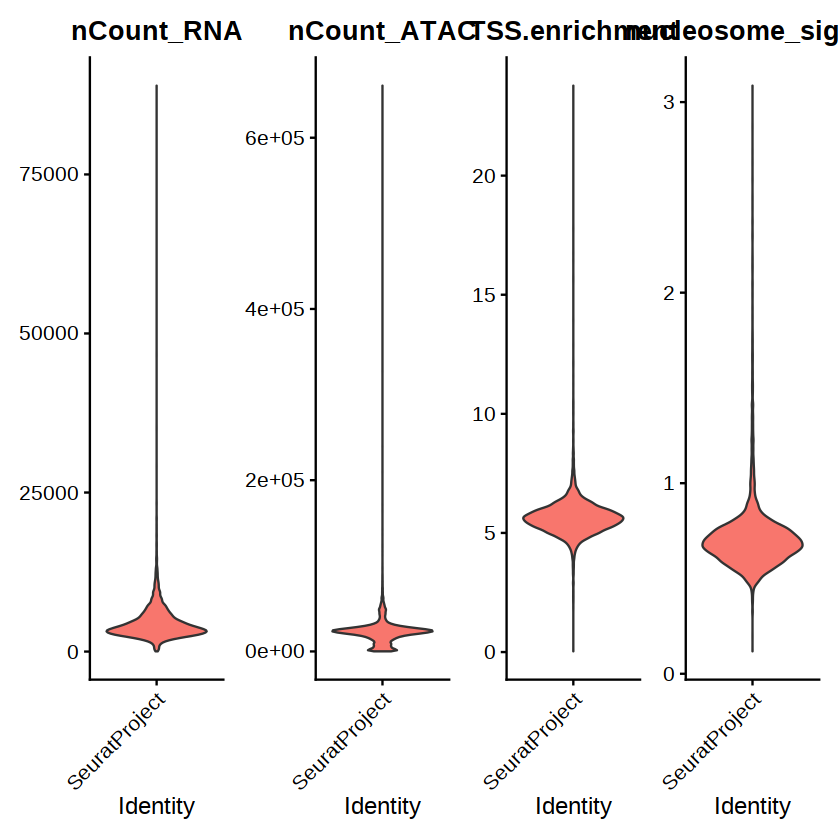

In [32]:
VlnPlot(
  object = pbmc,
  features = c("nCount_RNA", "nCount_ATAC", "TSS.enrichment", "nucleosome_signal"),
  ncol = 4,
  pt.size = 0
)

In [12]:
# filter out low quality cells
pbmc <- subset(
  x = pbmc,
  subset = nCount_ATAC < 100000 &
    nCount_RNA < 25000 &
    nCount_ATAC > 1000 &
    nCount_RNA > 1000 &
    nucleosome_signal < 2 &
    TSS.enrichment > 1
)
pbmc

An object of class Seurat 
204272 features across 11448 samples within 2 assays 
Active assay: ATAC (143614 features, 0 variable features)
 1 other assay present: RNA

In [38]:
class(t(pbmc[['RNA']]@counts))

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [13]:
dim(t(pbmc[['RNA']]@counts))

[1] 11448 60658

In [14]:
dim(t(pbmc[['ATAC']]@counts))

[1]  11448 143614

In [44]:
# library(Matrix)

In [45]:
# writeMM(t(pbmc[['RNA']]@counts), './data/PBMC/multiome/hg19/counts_rna.mtx')

NULL

In [48]:
# write(rownames(pbmc[['RNA']]), './data/PBMC/multiome/hg19/features_rna.txt')

In [15]:
write(colnames(pbmc[['RNA']]), './data/PBMC/multiome/hg19/cells_filtered.txt')

In [50]:
# writeMM(t(pbmc[['ATAC']]@counts), './data/PBMC/multiome/hg19/counts_atac.mtx')

NULL

In [51]:
# write(rownames(pbmc[['ATAC']]), './data/PBMC/multiome/hg19/features_atac.txt')

In [57]:
head(colnames(pbmc[['RNA']]))

[1] "AAACAGCCAAGGAATC-1" "AAACAGCCAATCCCTT-1" "AAACAGCCAATGCGCT-1"
[4] "AAACAGCCACACTAAT-1" "AAACAGCCACCAACCG-1" "AAACAGCCAGGATAAC-1"

In [56]:
head(colnames(pbmc[['ATAC']]))

[1] "AAACAGCCAAGGAATC-1" "AAACAGCCAATCCCTT-1" "AAACAGCCAATGCGCT-1"
[4] "AAACAGCCACACTAAT-1" "AAACAGCCACCAACCG-1" "AAACAGCCAGGATAAC-1"